In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_train = pd.read_csv("data/training60000.csv", header=None)
X_train = X_train.to_numpy()
y_train = pd.read_csv("data/training60000_labels.csv", header=None)
y_train = np.eye(10)[y_train.astype('int32')].reshape(60000,10)
X_test = pd.read_csv("data/testing10000.csv", header=None)
X_test = X_test.to_numpy()
y_test = pd.read_csv("data/testing10000_labels.csv", header=None)
y_test = np.eye(10)[y_test.astype('int32')].reshape(10000,10)

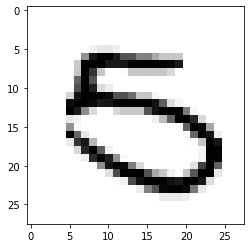

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 5
plt.imshow(X_train[i].reshape(28,28), cmap='Greys')
plt.show()
print(y_train[i])


In [4]:
class DeepNeuralNetwork:
    def __init__(self, X_train, y_train, learn_rate = 0.0001, epochs = 30, batch_size = 64):
        self.X_train = X_train 
        self.y_train = y_train
        self.learn_rate = learn_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
        self.batch_x = self.X_train[:batch_size]
        self.batch_y = self.y_train[:batch_size]
        
        np.random.seed(14)
        layer1_neurons = 784
        layer2_neurons = 392
        
        self.weight1 = np.random.randn(self.X_train.shape[1], layer1_neurons)
        self.bias1 = np.random.randn(layer1_neurons)
        self.weight2 = np.random.randn(layer1_neurons, layer2_neurons)
        self.bias2 = np.random.randn(layer2_neurons)
        self.weight3 = np.random.randn(layer2_neurons, self.batch_y.shape[1])
        self.bias3 = np.random.randn(self.weight3.shape[1])
        
    def forwardpass(self):
        self.z1 = self.batch_x.dot(self.weight1) + self.bias1
        # ReLU layer
        self.layer1 = np.maximum(0, self.z1)

        self.z2 = self.layer1.dot(self.weight2) + self.bias2
        # ReLU layer
        self.layer2 = np.maximum(0, self.z2)
        
        self.z3 = self.layer2.dot(self.weight3) + self.bias3
        z3 = self.z3 - np.max(self.z3, axis = 1).reshape(self.z3.shape[0], 1)
        # Softmax layer
        self.layer3 = np.exp(z3) / np.sum(np.exp(z3), axis = 1).reshape(z3.shape[0], 1)
        self.error = self.layer3 - self.batch_y

    def backpropagate(self):
        cost = (1 / self.batch_size) * self.error
        dweight3 = np.dot(cost.T, self.layer2).T
        dbias3 = np.sum(cost,axis = 0)
        self.weight3 = self.weight3 - self.learn_rate * dweight3
        self.bias3 = self.bias3 - self.learn_rate * dbias3
        
        dweight2 = np.dot((np.dot((cost), self.weight3.T) 
                            * (self.z2 > 0)).T, self.layer1).T
        dbias2 = np.sum(np.dot((cost),self.weight3.T) 
                            * (self.z2 > 0),axis = 0)
        self.weight2 = self.weight2 - self.learn_rate * dweight2
        self.bias2 = self.bias2 - self.learn_rate * dbias2

        dweight1 = np.dot((np.dot(np.dot((cost), self.weight3.T)
                            * (self.z2 > 0),self.weight2.T) * (self.z1 > 1)).T, self.batch_x).T
        dbias1 = np.sum((np.dot(np.dot((cost), self.weight3.T) 
                            * (self.z2 > 0), self.weight2.T) * (self.z1 > 1)), axis = 0)
        self.weight1 = self.weight1 - self.learn_rate * dweight1
        self.bias1 = self.bias1 - self.learn_rate * dbias1

    def train(self):
        for epoch in range(self.epochs):
            loss = 0
            for batch_size in range(self.X_train.shape[0] // self.batch_size - 1):
                a = batch_size * self.batch_size
                b = (batch_size + 1) * self.batch_size
                self.batch_x = self.X_train[a:b]
                self.batch_y = self.y_train[a:b]
                self.forwardpass()
                self.backpropagate()
                loss += np.mean(self.error ** 2)

            print('Epoch: {}\tLoss: {}'.format(epoch, loss))
        
    def results(self,xtest,ytest):
        self.batch_x = xtest
        self.batch_y = ytest
        self.forwardpass()
        correct = np.count_nonzero(np.argmax(self.layer3,axis=1) == np.argmax(self.batch_y, axis=1))
        incorrect = self.batch_x.shape[0] - correct
        accuracy = correct / self.batch_x.shape[0]
        print("====Results\nNetwork properties: Input: {0}, Batch Size: {1}, Output: {2}\nCorrect classification: {3}\nIncorrect classification: {4}\nAccuracy: {5}%"
                .format(X_train.shape[1], self.batch_size, self.batch_y.shape[1], correct, incorrect, round(100*accuracy,2)))


dnn = DeepNeuralNetwork(X_train, y_train) 
dnn.train()
dnn.results(X_test, y_test)



Epoch: 0	Loss: 84.63162650981336
Epoch: 1	Loss: 43.25464603256321
Epoch: 2	Loss: 34.83804665721932
Epoch: 3	Loss: 30.586131188074916
Epoch: 4	Loss: 27.90471175689956
Epoch: 5	Loss: 26.048141205381235
Epoch: 6	Loss: 24.45487276141241
Epoch: 7	Loss: 23.343754121957076
Epoch: 8	Loss: 22.200044389914652
Epoch: 9	Loss: 21.281110611691727
Epoch: 10	Loss: 20.56312846556491
Epoch: 11	Loss: 19.918498981492572
Epoch: 12	Loss: 19.19128517358737
Epoch: 13	Loss: 18.60025549031518
Epoch: 14	Loss: 18.09273269270078
Epoch: 15	Loss: 17.70007741952993
Epoch: 16	Loss: 17.221519945080136
Epoch: 17	Loss: 16.904776328974553
Epoch: 18	Loss: 16.5794761404037
Epoch: 19	Loss: 16.19594214685204
Epoch: 20	Loss: 15.796416811861972
Epoch: 21	Loss: 15.49791448880816
Epoch: 22	Loss: 15.176748413764175
Epoch: 23	Loss: 14.867398280313697
Epoch: 24	Loss: 14.649752292691588
Epoch: 25	Loss: 14.412183156942149
Epoch: 26	Loss: 14.173653893136832
Epoch: 27	Loss: 13.923566916376316
Epoch: 28	Loss: 13.584958562272998
Epoch: 29